In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggles-top-trending-datasets/CleanedKaggleDataSets.csv


In [2]:
df = pd.read_csv('/kaggle/input/kaggles-top-trending-datasets/CleanedKaggleDataSets.csv')
df.head()

,title,Usability_index,up_vote,author,Updation_timeline
0,Salary Prediction Data - Simple linear regression,Usability 10.0,31,Krishnaraj_DataScience,Updated 12 days ago
1,Heart Disease Prediction Dataset,Usability 10.0,31,Krishnaraj_DataScience,Updated 12 days ago
2,Time Series Air Quality Data of India (2010-2023),Usability 10.0,31,Krishnaraj_DataScience,Updated 12 days ago
3,Water Quality Testing,Usability 9.4,31,Krishnaraj_DataScience,Updated 12 days ago
4,Multiple Sclerosis Disease,Usability 10.0,31,Krishnaraj_DataScience,Updated 12 days ago


In [3]:
df.describe()

,up_vote
count,9714.000000
mean,73.489911
std,166.429326
min,0.000000
25%,8.000000
50%,31.000000
75%,59.000000
max,1697.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9714 entries, 0 to 9713
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              9714 non-null   object
 1   Usability_index    9712 non-null   object
 2   up_vote            9714 non-null   int64 
 3   author             9714 non-null   object
 4   Updation_timeline  9714 non-null   object
dtypes: int64(1), object(4)
memory usage: 379.6+ KB


In [5]:
df.dtypes

title                object
Usability_index      object
up_vote               int64
author               object
Updation_timeline    object
dtype: object

In [6]:
df.shape

(9714, 5)

In [7]:
df['author'].value_counts()

fedesoriano                 80
Utkarsh Singh               80
Aman Chauhan                76
M Yasser H                  60
Prasert Kanawattanachai     59
                            ..
Rito Ghosh                  17
Eryk Faracik                17
Mohinur Abdurahimova        17
Dieter                      17
Apoorva Mahalingappa        16
Name: author, Length: 457, dtype: int64

In [8]:
df['Updation_timeline'].value_counts()

 Updated 2 years ago      1516
 Updated 3 years ago      1436
 Updated a year ago       1015
 Updated 5 years ago       739
 Updated 4 years ago       706
 Updated 2 months ago      682
 Updated a month ago       658
 Updated 6 years ago       548
 Updated 3 months ago      404
 Updated 4 months ago      366
 Updated 5 months ago      196
 Updated 10 months ago     176
 Updated 8 months ago      154
 Updated 6 months ago      138
 Updated 9 months ago      134
 Updated 25 days ago       118
 Updated 7 months ago      116
 Updated 22 days ago        98
 Updated 17 days ago        58
 Updated 10 days ago        40
 Updated 11 hours ago       40
 Updated 12 days ago        40
 Updated 14 days ago        40
 Updated 19 days ago        40
 Updated 21 days ago        40
 Updated 7 years ago        39
 Updated 10 hours ago       20
 Updated 20 days ago        20
 Updated a day ago          20
 Updated 16 hours ago       20
 Updated 6 hours ago        20
 Updated 16 days ago        20
 Updated

In [9]:
df['up_vote'].value_counts()

0      697
1      408
2      251
4      249
33     232
      ... 
104     19
126     19
279     18
130     18
109     18
Name: up_vote, Length: 157, dtype: int64

In [10]:
df['Usability_index'].value_counts()

Usability 10.0    2611
Usability 9.4      808
Usability 8.8      770
Usability 8.2      571
Usability 7.1      439
Usability 7.6      319
Usability 7.5      307
Usability 1.9      294
Usability 3.1      225
Usability 6.5      217
Usability 5.9      213
Usability 1.8      210
Usability 9.7      198
Usability 2.9      191
Usability 8.1      183
Usability 2.5      176
Usability 5.3      162
Usability 6.3      149
Usability 6.9      135
Usability 8.5      134
Usability 4.7      127
Usability 4.1      127
Usability 3.8      123
Usability 1.3      121
Usability 5.6      118
Usability 4.4      105
Usability 9.1       97
Usability 5.0       94
Usability 3.5       91
Usability 1.2       83
Usability 2.4       81
Usability 7.9       61
Usability 7.4       59
Usability 0.6       45
Usability 0.0       33
Usability 6.8       26
Usability 6.2        8
Usability 3.2        1
Name: Usability_index, dtype: int64

In [11]:
df['title'].value_counts()

Salary Prediction Data - Simple linear regression    1
26april_seresnet50_5epochs                           1
Adani Stocks Dataset                                 1
Healthy vs. Diseased Leaf Image Dataset              1
US simulation & segmentation                         1
                                                    ..
Shoe vs Sandal vs Boot Image Dataset (15K Images)    1
Event-dataset for Underwater SLAM                    1
Forest Fire Area                                     1
beginner_datasets                                    1
Bengali Sign Language Dataset                        1
Name: title, Length: 9714, dtype: int64

In [12]:
df['usability_percent'] = df['Usability_index'].value_counts()/9714

In [13]:
df.head()

,title,Usability_index,up_vote,author,Updation_timeline,usability_percent
0,Salary Prediction Data - Simple linear regression,Usability 10.0,31,Krishnaraj_DataScience,Updated 12 days ago,NaN
1,Heart Disease Prediction Dataset,Usability 10.0,31,Krishnaraj_DataScience,Updated 12 days ago,NaN
2,Time Series Air Quality Data of India (2010-2023),Usability 10.0,31,Krishnaraj_DataScience,Updated 12 days ago,NaN
3,Water Quality Testing,Usability 9.4,31,Krishnaraj_DataScience,Updated 12 days ago,NaN
4,Multiple Sclerosis Disease,Usability 10.0,31,Krishnaraj_DataScience,Updated 12 days ago,NaN


<Axes: ylabel='Usability_index'>

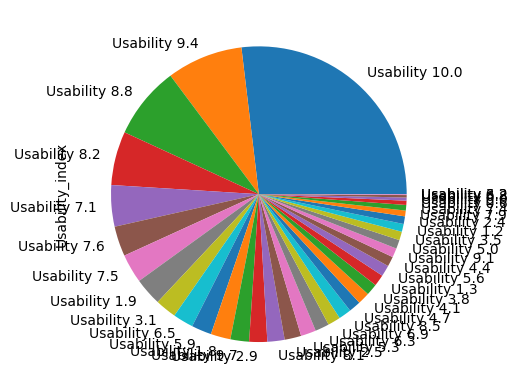

In [14]:
df['Usability_index'].value_counts().plot.pie()

<Axes: ylabel='Updation_timeline'>

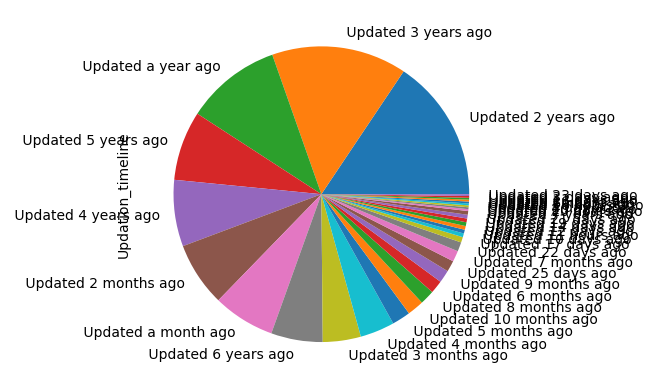

In [15]:
df['Updation_timeline'].value_counts().plot.pie()